In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from modules.preprocess_text import preprocess_text

# removes chained assignment warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
path = '../data/casaData/'
df = pd.read_csv(path + 'trainListings.csv', header=0, usecols=[x for x in range(17)])

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_23881/906435895.py:2: DtypeWarning: Columns (0,4,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + 'trainListings.csv', header=0, usecols=[x for x in range(17)])


In [4]:
df.shape

(83053, 17)

In [5]:
# turn id to numeric and remove ones that are not numeric 
df['id_clean'] = pd.to_numeric(df['id'], errors='coerce')
# removes non-numbers that became nans after to_numeric
df = df.dropna(subset='id_clean')
# convert to int
df['id_clean'] = df['id_clean'].astype(int)

In [6]:
df.isna().sum()

id                 0
sourceId           0
locationId         7
typeId             2
price           6176
rooms          74564
bedrooms       12843
bathrooms      14823
totalArea      26340
livingArea     52130
plotArea       38794
terraceArea    65921
title           4304
description     2861
features       40718
latitude       67125
longitude      67355
id_clean           0
dtype: int64

In [7]:
df_text = df[['title', 'description', 'features','id_clean']]

In [8]:
df_text[(df_text['title'].isna() & df_text['description'].isna() & df_text['features'].isna())]

,title,description,features,id_clean
849,NaN,NaN,NaN,1020
1078,NaN,NaN,NaN,1312
2141,NaN,NaN,NaN,2573
4590,NaN,NaN,NaN,5698
5740,NaN,NaN,NaN,7100
...,...,...,...,...
81679,NaN,NaN,NaN,103224
82562,NaN,NaN,NaN,104432
82563,NaN,NaN,NaN,104433
82711,NaN,NaN,NaN,104639


In [9]:
# drop rows that have missing title description and features
df_text = df_text[~(df_text['title'].isna() & df_text['description'].isna() & df_text['features'].isna())]

In [10]:
print(df_text.isna().sum())
print(df_text.shape)

title           4095
description     2652
features       40509
id_clean           0
dtype: int64
(82842, 4)


In [11]:
df_text[(df_text['title'].isna() & df_text['description'].isna() & df_text['features'].isna())]

,title,description,features,id_clean


In [12]:
df_text[df_text['title'].isna()]

,title,description,features,id_clean
8,NaN,NaN,Furnished kitchenReform recommended.Direct sea...,9
51,NaN,"With spectacular views of Puerto de Andratx, t...",NaN,52
79,NaN,Luxurious and well-equipped Country Estate of ...,NaN,80
90,NaN,"""La Granja dAdalt"" is one of Mallorcas luxuri...",NaN,91
132,NaN,mpressive country mansion in process of being ...,NaN,133
...,...,...,...,...
82979,NaN,Casa Dia Ibiza is a luxury villa nestled in th...,"Air conditioning, Fully equipped kitchen, Inte...",104961
82998,NaN,Totally renovated original WINDMILL located in...,NaN,104981
83001,NaN,This exciting new quality development situated...,"Air Conditioning,Amenities,Banks,Bars,Beaches,...",104984
83043,NaN,Small villa with many possibilities built on a...,NaN,105033


In [13]:
# fill missing text with nothing 
df_text = df_text.fillna('')

In [14]:
df_text['all_text'] = df_text['title'] + ' ' + df_text['description'] + ' ' + df_text['features']

In [15]:
df_text.head()

,title,description,features,id_clean,all_text
0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",1,Exquisite manor house amidst the Tramontana va...
1,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,,2,Finca in Puigpunyent (Objektnummer KSV00142) M...
2,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,,3,Magnificent Mallorquinian Mansion of XVII cent...
3,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,,4,Magnificent Mallorquinian Mansion of XVII cent...
4,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",5,Mallorquinian Mansion of XVII century on the m...


In [16]:
df_text.isna().sum()

title          0
description    0
features       0
id_clean       0
all_text       0
dtype: int64

In [17]:
df_text.shape

(82842, 5)

In [18]:
df_text['all_text'] = df_text['all_text'].astype('str')

In [19]:
df_text['features_cleaned'] = preprocess_text(df_text['features'])

In [20]:
df_text['all_text_cleaned'] = preprocess_text(df_text['all_text'])

In [21]:
df_text.head()

,title,description,features,id_clean,all_text,features_cleaned,all_text_cleaned
0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",1,Exquisite manor house amidst the Tramontana va...,fireplace guest apartment air conditioning pat...,exquisite manor house amidst tramontana valley...
1,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,,2,Finca in Puigpunyent (Objektnummer KSV00142) M...,,finca puigpunyent objektnummer magnificent mal...
2,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,,3,Magnificent Mallorquinian Mansion of XVII cent...,,magnificent mallorquinian mansion xvii century...
3,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,,4,Magnificent Mallorquinian Mansion of XVII cent...,,magnificent mallorquinian mansion xvii century...
4,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",5,Mallorquinian Mansion of XVII century on the m...,air condition garden use mint condition passen...,mallorquinian mansion xvii century majestic mo...


In [22]:
df_text.all_text_cleaned.sample(10)

68965    los granados golf stunning front line golf dup...
48465    apartment close beach santa ponsa apartment lo...
73771    property detail apartment mirador de nueva and...
26637                  apartment partly sea view ca catala
60242    unique seafront master piece villa port adrian...
20334    villa mediterranean style santa ponsa villa me...
17356    beautiful town house quiet location beautiful ...
36763    new apartment nice residential complex puerto ...
7017     villa palma de mallorca objektnummer beautiful...
19648    townhouse pollensa objektnummer townhouse situ...
Name: all_text_cleaned, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Getting top features listed that can to be one hot encoded 

In [24]:
cv = CountVectorizer(max_features=50, analyzer='word', ngram_range=(1,2), min_df=5, max_df=0.95)

In [25]:
feats_vector = cv.fit_transform(df_text['features_cleaned'])

In [26]:
feats_vector.shape

(82842, 50)

In [27]:
df_feat_vects = pd.DataFrame(feats_vector.toarray())

In [28]:
df_feat_vects.columns = cv.get_feature_names_out()

In [29]:
df_feat_vects.head()

,air,air conditioning,amenity,area,balcony,bathroom,bedroom,builtin,builtin kitchen,central,...,security,swimming,swimming pool,system,terrace,view,walking,walking distance,wardrobe,water
0,1,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [30]:
sum_words = df_feat_vects.sum(axis=0)
sum_words.sort_values(ascending=False).head(20)

view                25888
terrace             25282
pool                23277
kitchen             19547
garden              19337
room                19335
air                 17731
conditioning        16134
air conditioning    16034
close               13187
heating             13076
sea                 13046
fitted              11721
fireplace           11177
area                11078
private             10644
swimming             9750
swimming pool        9750
distance             8330
bathroom             8085
dtype: int64

In [31]:
print(df_feat_vects.columns[0:50])

Index(['air', 'air conditioning', 'amenity', 'area', 'balcony', 'bathroom',
       'bedroom', 'builtin', 'builtin kitchen', 'central', 'central heating',
       'close', 'community', 'condition', 'conditioning', 'covered',
       'covered terrace', 'dining', 'distance', 'fireplace', 'fitted',
       'fitted wardrobe', 'floor', 'fully', 'furnished', 'garage', 'garden',
       'golf', 'guest', 'heating', 'kitchen', 'mountain', 'mountain view',
       'near', 'parking', 'pool', 'private', 'room', 'sea', 'sea view',
       'security', 'swimming', 'swimming pool', 'system', 'terrace', 'view',
       'walking', 'walking distance', 'wardrobe', 'water'],
      dtype='object')


TfidfVectorizer for modelling 

In [32]:
df_text.head()

,title,description,features,id_clean,all_text,features_cleaned,all_text_cleaned
0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",1,Exquisite manor house amidst the Tramontana va...,fireplace guest apartment air conditioning pat...,exquisite manor house amidst tramontana valley...
1,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,,2,Finca in Puigpunyent (Objektnummer KSV00142) M...,,finca puigpunyent objektnummer magnificent mal...
2,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,,3,Magnificent Mallorquinian Mansion of XVII cent...,,magnificent mallorquinian mansion xvii century...
3,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,,4,Magnificent Mallorquinian Mansion of XVII cent...,,magnificent mallorquinian mansion xvii century...
4,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",5,Mallorquinian Mansion of XVII century on the m...,air condition garden use mint condition passen...,mallorquinian mansion xvii century majestic mo...


In [33]:
ti_vectorizer = TfidfVectorizer(max_features=250, analyzer='word', use_idf=True, min_df=10, max_df=0.90)

In [34]:
ti_vectorizer.fit(df_text['all_text_cleaned'])

TfidfVectorizer(max_df=0.9, max_features=250, min_df=10)

In [35]:
text_vect = ti_vectorizer.transform(df_text['all_text_cleaned'])

In [36]:
df_text_vect = pd.DataFrame(text_vect.toarray())

In [37]:
df_text_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.0,0.106597,0.123666,0.0,0.0,0.0,0.100510,0.0,0.06351,0.0,...,0.000000,0.0,0.0,0.087721,0.230942,0.0,0.0,0.0,0.230277,0.110115
1,0.0,0.000000,0.113271,0.0,0.0,0.0,0.184123,0.0,0.00000,0.0,...,0.214868,0.0,0.0,0.160695,0.141020,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.106060,0.0,0.0,0.0,0.172401,0.0,0.00000,0.0,...,0.201189,0.0,0.0,0.150465,0.132042,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.106060,0.0,0.0,0.0,0.172401,0.0,0.00000,0.0,...,0.201189,0.0,0.0,0.150465,0.132042,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.187371,0.0,0.0,0.0,0.152286,0.0,0.00000,0.0,...,0.177715,0.0,0.0,0.132909,0.116636,0.0,0.0,0.0,0.000000,0.000000


In [38]:
df_text_vect.shape

(82842, 250)

In [39]:
df_text_vect['id_clean'] = df_text['id_clean']

In [40]:
df_text_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,id_clean
0,0.0,0.106597,0.123666,0.0,0.0,0.0,0.100510,0.0,0.06351,0.0,...,0.0,0.0,0.087721,0.230942,0.0,0.0,0.0,0.230277,0.110115,1.0
1,0.0,0.000000,0.113271,0.0,0.0,0.0,0.184123,0.0,0.00000,0.0,...,0.0,0.0,0.160695,0.141020,0.0,0.0,0.0,0.000000,0.000000,2.0
2,0.0,0.000000,0.106060,0.0,0.0,0.0,0.172401,0.0,0.00000,0.0,...,0.0,0.0,0.150465,0.132042,0.0,0.0,0.0,0.000000,0.000000,3.0
3,0.0,0.000000,0.106060,0.0,0.0,0.0,0.172401,0.0,0.00000,0.0,...,0.0,0.0,0.150465,0.132042,0.0,0.0,0.0,0.000000,0.000000,4.0
4,0.0,0.000000,0.187371,0.0,0.0,0.0,0.152286,0.0,0.00000,0.0,...,0.0,0.0,0.132909,0.116636,0.0,0.0,0.0,0.000000,0.000000,5.0


In [41]:
df_text_vect.to_csv('trainListings_textVect_250.csv')

In [42]:
cv_wc = CountVectorizer(ngram_range=(2,3), stop_words='english', min_df=10, max_df=0.8, max_features=250)

In [43]:
word_count_vector = cv_wc.fit_transform(df_text['all_text_cleaned'])

In [49]:
# dirty_word_vector = cv_wc.fit_transform(df_text['all_text'])

In [44]:
listings_vocab = cv_wc.vocabulary_

In [50]:
# listings_vocab_dirty = cv_wc.vocabulary_

In [45]:
from wordcloud import WordCloud

In [51]:
wc = WordCloud(background_color='white', width=1080, height=720, colormap='YlOrRd').generate_from_frequencies(listings_vocab)

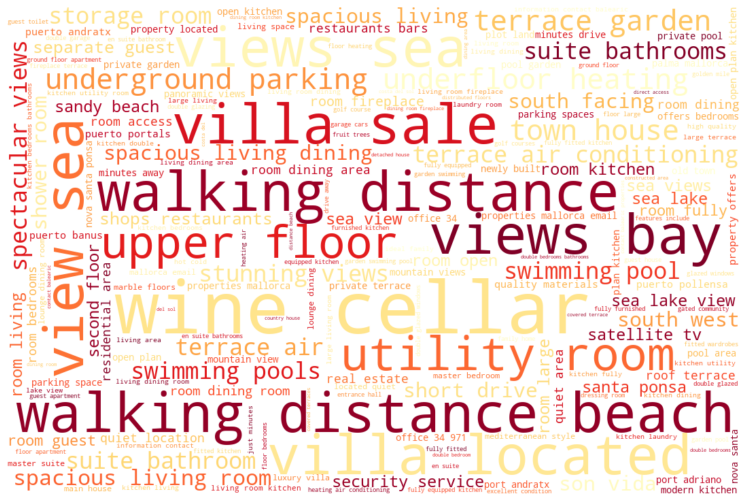

In [52]:
plt.figure(figsize=(16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
# plt.savefig('wordcloud_2ngram_2.png', dpi=300)
plt.show()